# Pandas教程

### 2017七月在线 机器学习线上集训 julyedu.com

### stock project

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [141]:
import pandas as pd
%matplotlib inline
import numpy as np

In [142]:
goog = pd.read_csv("data/GOOG.csv", index_col=0)
goog.index = pd.to_datetime(goog.index)
# goog

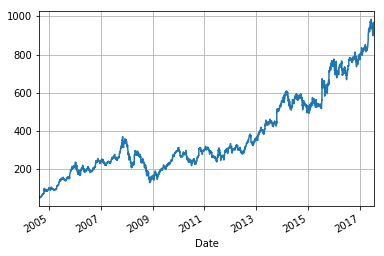

In [11]:
goog["Adj Close"].plot(grid = True)

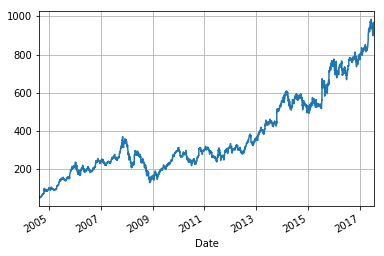

In [12]:
goog["Close"].plot(grid = True)

```shift```这个function可以帮我们移动时间

In [13]:
goog.shift(1).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,49.813286,51.835709,47.800831,49.982655,49.982655,44871300.0
2004-08-23,50.316402,54.336334,50.062355,53.952770,53.952770,22942800.0
2004-08-24,55.168217,56.528118,54.321388,54.495735,54.495735,18342800.0
2004-08-25,55.412300,55.591629,51.591621,52.239193,52.239193,15319700.0


In [14]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


datetime indexing

In [36]:
datetime.date(2014,1,1)

datetime.date(2014, 1, 1)

In [43]:
goog["log-return"] = np.log(goog["Adj Close"] / goog["Adj Close"].shift(1))
print(goog["log-return"].head())

Date
2004-08-19         NaN
2004-08-20    0.076433
2004-08-23    0.010013
2004-08-24   -0.042289
2004-08-25    0.010718
Name: log-return, dtype: float64


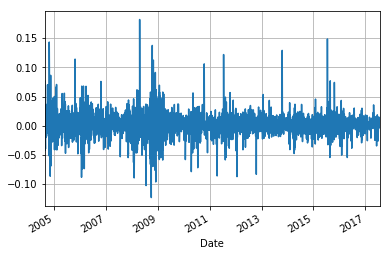

In [44]:
goog["log-return"].plot(grid=True)

In [143]:
aapl = pd.read_csv("data/AAPL.csv", index_col=0)
aapl.index = pd.to_datetime(aapl.index)
aapl["Adj Close"].plot(grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

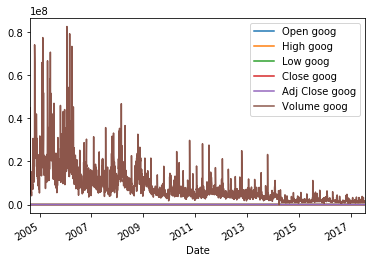

In [148]:
goog.join(aapl, lsuffix=" goog", rsuffix=" aapl").plot()

In [50]:
aapl["Adj Close"] = pd.to_numeric(aapl["Adj Close"])

ValueError: Unable to parse string "null" at position 165

In [58]:
aapl["Adj Close"][aapl["Adj Close"] == "null"] = np.NaN

In [59]:
aapl["Adj Close"] = aapl["Adj Close"].bfill()

In [61]:
# aapl["Adj Close"]

Date
1980-12-12      0.423252
1980-12-15      0.401170
1980-12-16      0.371726
1980-12-17      0.380927
1980-12-18      0.391969
1980-12-19      0.415892
1980-12-22      0.436134
1980-12-23      0.454536
1980-12-24      0.478460
1980-12-26      0.522625
1980-12-29      0.529986
1980-12-30      0.517104
1980-12-31      0.502382
1981-01-02      0.507903
1981-01-05      0.496862
1981-01-06      0.474779
1981-01-07      0.454536
1981-01-08      0.445336
1981-01-09      0.469258
1981-01-12      0.465578
1981-01-13      0.449016
1981-01-14      0.450856
1981-01-15      0.460057
1981-01-16      0.456377
1981-01-19      0.483980
1981-01-20      0.469258
1981-01-21      0.478460
1981-01-22      0.483980
1981-01-23      0.482140
1981-01-26      0.474779
                 ...    
2017-06-08    154.990005
2017-06-09    148.979996
2017-06-12    145.419998
2017-06-13    146.589996
2017-06-14    145.160004
2017-06-15    144.289993
2017-06-16    142.270004
2017-06-19    146.339996
2017-06-20    145.00

In [62]:
aapl["Adj Close"] = aapl["Adj Close"].apply(lambda x: float(x))

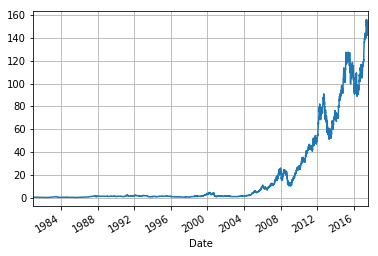

In [63]:
aapl["Adj Close"].plot(grid=True)

In [64]:

msft = pd.read_csv("data/MSFT.csv", index_col=0)

msft.index = pd.to_datetime(msft.index)


In [65]:

stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})

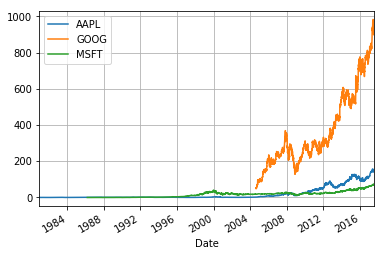

In [66]:
# stocks = pd.to_numeric(stocks)
stocks.plot(grid=True)

In [67]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

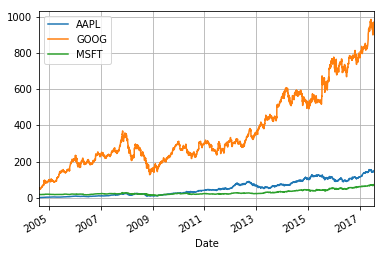

In [68]:
valid_stocks.plot(grid=True)

AAPL    float64
GOOG    float64
MSFT    float64
dtype: object

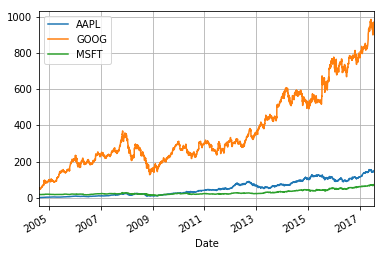

In [69]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

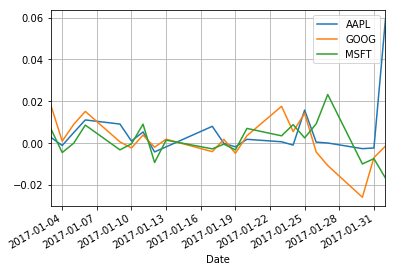

In [74]:
valid_stocks_lr = np.log(valid_stocks / valid_stocks.shift(1))
valid_stocks_lr.loc["2017-01-01":"2017-02-01"].plot(grid=True)

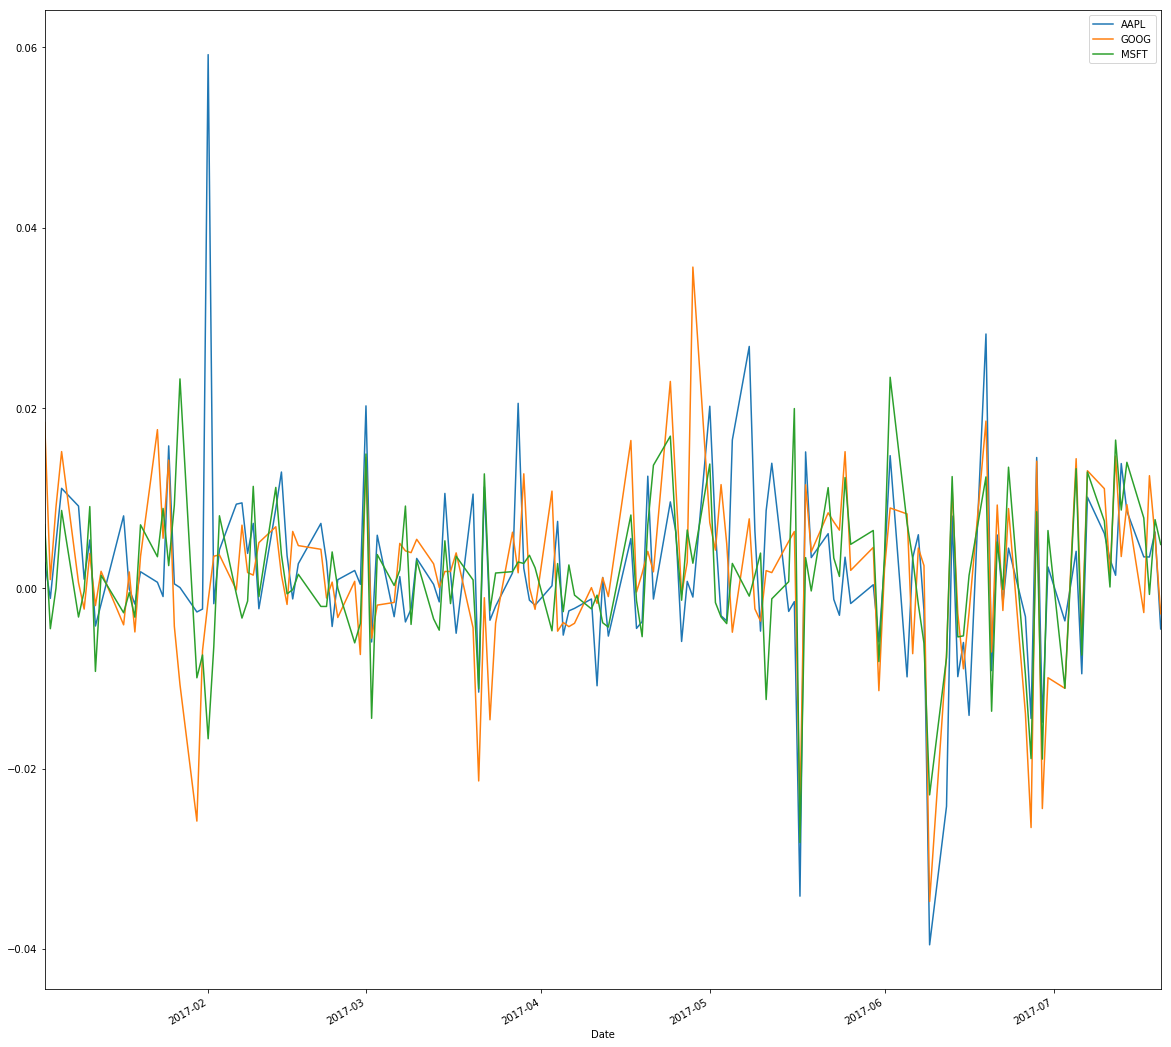

In [75]:
valid_stocks_lr[valid_stocks_lr.index > pd.to_datetime("2017-01-01")].plot(figsize=(20, 20))

In [86]:
valid_stocks.head()

,AAPL,GOOG,MSFT
Date,,,
2004-08-19,1.981210,49.982655,18.360205
2004-08-20,1.987016,53.952770,18.414366
2004-08-23,2.005080,54.495735,18.495850
2004-08-24,2.061206,52.239193,18.495850
2004-08-25,2.132171,52.802086,18.706341


### 下面我们试试能不能把日K图变成月K图

In [76]:
monthly_stocks = valid_stocks.groupby([valid_stocks.index.year, valid_stocks.index.month]).last()
monthly_stocks

AAPL        GOOG       MSFT
Date Date                                   
2004 8       2.225070   50.993862  18.536587
     9       2.499898   64.558022  18.774242
     10      3.380507   94.964050  18.991516
     11      4.325631   90.650223  20.288960
     12      4.154669   96.035034  20.220860
2005 1       4.961088   97.444756  19.887878
     2       5.788151   93.643997  19.099041
     3       5.376554   89.917969  18.347527
     4       4.652713  109.589233  19.205309
     5       5.130114  138.117310  19.646990
     6       4.749484  146.525787  18.915941
     7       5.503002  143.342712  19.502306
     8       6.050076  142.466003  20.912022
     9       6.917136  157.639130  19.651812
     10      7.430664  185.375168  19.628889
     11      8.750609  201.698990  21.203133
     12      9.275754  206.655411  20.031137
2006 1       9.742828  215.522171  21.563158
     2       8.837059  180.632950  20.652407
     3       8.092573  194.271820  20.913734
     4       9.082209  208.189651  18.561808
     5       7.711944  185.215759  17.476786
     6       7.389377  208.882065  17.978323
     7       8.768673  192.578171  18.564741
     8       8.754478  188.558243  19.903198
     9       9.932499  200.199600  21.181025
     10     10.461510  237.305527  22.234270
     11     11.826615  241.499802  22.815401
     12     10.946650  229.380234  23.203939
2007 1      11.061483  249.813644  23.981028
...               ...         ...        ...
2015 2     123.003296  556.871094  41.354286
     3     119.144463  546.499573  38.345856
     4     119.833878  537.340027  45.871666
     5     125.267044  532.109985  44.480183
     6     120.603661  520.510010  41.907818
     7     116.632576  625.609985  44.328312
     8     108.911949  618.250000  41.582230
     9     106.535904  608.419983  42.289272
     10    115.421944  710.809998  50.296143
     11    114.751991  742.599976  52.280025
     12    102.103088  758.880005  53.366989
2016 1      94.420609  742.950012  52.991844
     2      94.299042  697.770020  49.293587
     3     106.294884  744.950012  53.507950
     4      91.421997  693.010010  48.315075
     5      97.983612  735.719971  51.706627
     6      93.803650  692.099976  49.921288
     7     102.251869  768.789978  55.296825
     8     104.670319  767.049988  56.407177
     9     111.526680  777.289978  56.544609
     10    112.010071  784.539978  58.822102
     11    109.590553  758.039978  59.555504
     12    114.845985  771.820007  61.413525
2017 1     120.329475  796.789978  63.894184
     2     136.426895  823.210022  63.615360
     3     143.069473  829.559998  65.484650
     4     143.059494  905.960022  68.069824
     5     152.759995  964.859985  69.839996
     6     144.020004  908.729980  68.930000
     7     150.339996  968.150024  74.220001

[156 rows x 3 columns]

In [77]:
index = [ str(i[0]) + "-" + str(i[1]) for i in monthly_stocks.index.values]
print(index)
index = pd.core.indexes.period.PeriodIndex(index, freq="M")

['2004-8', '2004-9', '2004-10', '2004-11', '2004-12', '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6', '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12', '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6', '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12', '2007-1', '2007-2', '2007-3', '2007-4', '2007-5', '2007-6', '2007-7', '2007-8', '2007-9', '2007-10', '2007-11', '2007-12', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12', '2009-1', '2009-2', '2009-3', '2009-4', '2009-5', '2009-6', '2009-7', '2009-8', '2009-9', '2009-10', '2009-11', '2009-12', '2010-1', '2010-2', '2010-3', '2010-4', '2010-5', '2010-6', '2010-7', '2010-8', '2010-9', '2010-10', '2010-11', '2010-12', '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12', '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012

In [78]:
monthly_stocks.index = index #= monthly_stocks.index.

In [80]:
monthly_stocks

,AAPL,GOOG,MSFT
2004-08,2.225070,50.993862,18.536587
2004-09,2.499898,64.558022,18.774242
2004-10,3.380507,94.964050,18.991516
2004-11,4.325631,90.650223,20.288960
2004-12,4.154669,96.035034,20.220860
2005-01,4.961088,97.444756,19.887878
2005-02,5.788151,93.643997,19.099041
2005-03,5.376554,89.917969,18.347527
2005-04,4.652713,109.589233,19.205309
2005-05,5.130114,138.117310,19.646990


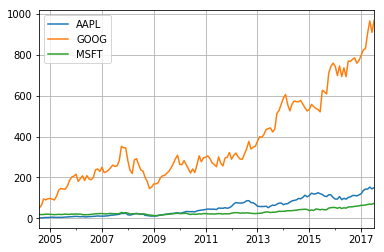

In [81]:
monthly_stocks.plot(grid=True)

In [83]:
monthly_stocks.loc["2011-8"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

In [84]:
monthly_stocks.loc["2011/8"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

In [85]:
monthly_stocks.loc["8/2011"]

AAPL     49.653461
GOOG    269.469971
MSFT     22.714565
Name: 2011-08, dtype: float64

## 特征处理


更多资料参考寒小阳的教程[link](https://github.com/HanXiaoyang/Feature_Engineering_and_XGBoost_Parameter_Tuning/blob/master/Feature%20Engineering.ipynb)

In [86]:
import pandas as pd
import numpy as np
# import matplotlib.pyploy as plt
%matplotlib inline

In [88]:
df = pd.read_csv("data/credit-data.csv")
df.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [103]:
for i, val in enumerate(df):
    print(df[val].value_counts())

0    104905
1      7510
Name: serious_dlqin2yrs, dtype: int64
0.000000    8154
1.000000    7651
1.000000      13
0.950100       6
0.982004       4
0.717131       4
0.004999       4
0.120879       4
0.988024       4
0.921079       4
0.990033       4
0.003650       4
0.857143       4
0.076923       4
0.017849       4
0.002500       4
0.017749       4
0.912176       4
0.161677       4
0.000800       4
0.035964       4
0.538922       4
0.058941       4
0.007984       4
0.713147       4
0.018798       4
0.999001       4
0.992016       4
1.105788       4
0.147705       3
            ... 
0.129278       1
0.929222       1
0.043920       1
0.691795       1
0.067803       1
0.079228       1
0.081027       1
0.606954       1
0.016722       1
0.121215       1
0.006934       1
0.091811       1
0.329528       1
0.070119       1
0.440980       1
0.011720       1
0.410886       1
0.024189       1
0.995846       1
0.200634       1
0.046474       1
0.042231       1
0.732798       1
0.728896       1
0.9

### [cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

In [106]:
df['income_bins'] = pd.cut(df.monthly_income, bins=15)
pd.value_counts(df['income_bins'])

(-3008.75, 200583.333]        112392
(200583.333, 401166.667]          11
(601750.0, 802333.333]             5
(401166.667, 601750.0]             4
(2808166.667, 3008750.0]           1
(1404083.333, 1604666.667]         1
(802333.333, 1002916.667]          1
(2607583.333, 2808166.667]         0
(2407000.0, 2607583.333]           0
(2206416.667, 2407000.0]           0
(2005833.333, 2206416.667]         0
(1805250.0, 2005833.333]           0
(1604666.667, 1805250.0]           0
(1203500.0, 1404083.333]           0
(1002916.667, 1203500.0]           0
Name: income_bins, dtype: int64

In [107]:
df['income_bins'] = pd.cut(df.monthly_income, bins=15, labels=False)
pd.value_counts(df.income_bins)

0     112392
1         11
3          5
2          4
14         1
7          1
4          1
Name: income_bins, dtype: int64

In [112]:
df["monthly_income"] = df["monthly_income"].fillna(df["monthly_income"].mean())

In [114]:
df["income_bins"] = np.log(df.monthly_income)

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [119]:
df["income_bins"] = df["income_bins"].replace([np.inf, -np.inf], 0)

In [121]:
df["income_bins"] = df["income_bins"].astype("int")

In [122]:
df[["income_bins", "serious_dlqin2yrs"]].groupby("income_bins").mean()

,serious_dlqin2yrs
income_bins,
0,0.038346
1,0.200000
2,0.000000
3,0.000000
4,0.029412
5,0.042254
6,0.055284
7,0.095066
8,0.067735


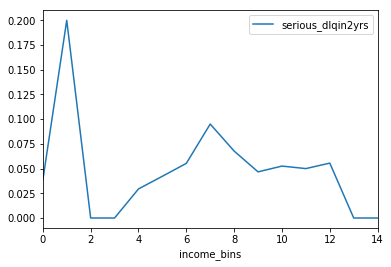

In [123]:
cols = ['income_bins', 'serious_dlqin2yrs']
income_means = df[cols].groupby("income_bins").mean()
income_means.plot()

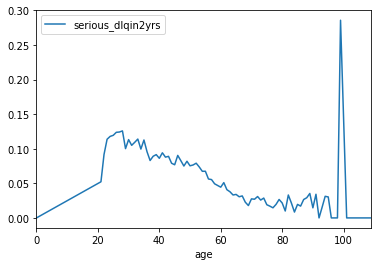

In [124]:
cols = ['age', 'serious_dlqin2yrs']
age_means = df[cols].groupby("age").mean()
age_means.plot()

In [125]:
mybins = [0] + list(range(20, 80, 5)) + [120]
df['age_bucket'] = pd.cut(df.age, bins=mybins)
df['age_bucket'].value_counts()

(45, 50]     14112
(50, 55]     13390
(55, 60]     12629
(60, 65]     12317
(40, 45]     12053
(35, 40]     10241
(65, 70]      8315
(30, 35]      8123
(75, 120]     7581
(25, 30]      5803
(70, 75]      5600
(20, 25]      2250
(0, 20]          0
Name: age_bucket, dtype: int64

In [126]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().fillna(0)

,serious_dlqin2yrs
age_bucket,
"(0, 20]",0.000000
"(20, 25]",0.109778
"(25, 30]",0.116319
"(30, 35]",0.108211
"(35, 40]",0.088956
"(40, 45]",0.085124
"(45, 50]",0.080995
"(50, 55]",0.072890
"(55, 60]",0.050598


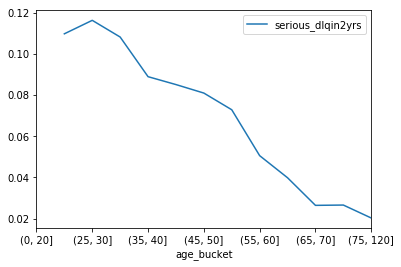

In [127]:
df[["age_bucket", "serious_dlqin2yrs"]].groupby("age_bucket").mean().plot()

把categorize的类型转换成数值类型

In [130]:
labels, levels = pd.factorize(df.age_bucket)
df.age_bucket = labels
df.age_bucket.head()

0    0
1    1
2    1
3    2
4    3
Name: age_bucket, dtype: int64

[quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)

In [132]:
bins = []

for q in [0.2, 0.4, 0.6, 0.8, 1.0]:
    bins.append(df.debt_ratio.quantile(q))

debt_ratio_binned = pd.cut(df.debt_ratio, bins=bins)
debt_ratio_binned
print(pd.value_counts(debt_ratio_binned))

(3.838, 307001.0]    22483
(0.467, 3.838]       22483
(0.287, 0.467]       22483
(0.134, 0.287]       22483
Name: debt_ratio, dtype: int64


In [140]:
debt_ratio_binned

0            (0.467, 3.838]
1                       NaN
2                       NaN
3                       NaN
4            (0.287, 0.467]
5            (0.134, 0.287]
6            (0.467, 3.838]
7            (0.287, 0.467]
8            (0.467, 3.838]
9            (0.287, 0.467]
10        (3.838, 307001.0]
11           (0.134, 0.287]
12           (0.134, 0.287]
13           (0.467, 3.838]
14                      NaN
15           (0.287, 0.467]
16           (0.467, 3.838]
17           (0.134, 0.287]
18           (0.467, 3.838]
19                      NaN
20                      NaN
21                      NaN
22           (0.134, 0.287]
23           (0.467, 3.838]
24                      NaN
25           (0.467, 3.838]
26           (0.134, 0.287]
27                      NaN
28           (0.467, 3.838]
29        (3.838, 307001.0]
                ...        
112385    (3.838, 307001.0]
112386                  NaN
112387    (3.838, 307001.0]
112388    (3.838, 307001.0]
112389    (3.838, 30